<a href="https://colab.research.google.com/github/Siddhes2/TechNext_Task/blob/Task5/TechNext_Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
def load_data():
    """
    Load the Telco Customer Churn dataset.
    """
    data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    return data

# Preprocess the data
def preprocess_data(data):
    """
    Handle missing values, encode categorical variables, and split into features and target.
    """
    # Handle missing values in 'TotalCharges' (replace empty strings with NaN and drop)
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
    data.dropna(inplace=True)

    # Drop customerID as it's not useful for prediction
    data.drop('customerID', axis=1, inplace=True)

    # Encode categorical variables
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col != 'Churn':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

    # Encode target variable
    data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

    # Split into features and target
    X = data.drop('Churn', axis=1)
    y = data['Churn']

    return X, y

In [ ]:
# Split the data into training and testing sets
def split_data(X, y, test_size=0.2):
    """
    Split the data into training and testing sets.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

# Train and tune Decision Tree
def train_decision_tree(X_train, y_train):
    """
    Train a Decision Tree classifier with hyperparameter tuning.
    """
    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    dt = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Train and tune Random Forest
def train_random_forest(X_train, y_train):
    """
    Train a Random Forest classifier with hyperparameter tuning.
    """
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model and print performance metrics.
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    return y_pred

In [ ]:
# Evaluate the model
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model and print performance metrics.
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    return y_pred

# Plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    """
    Plot the confusion matrix for the model.
    """
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


Training Decision Tree...
Decision Tree Performance:
Accuracy: 0.7669
Precision: 0.5685
Recall: 0.5107
F1-Score: 0.5380


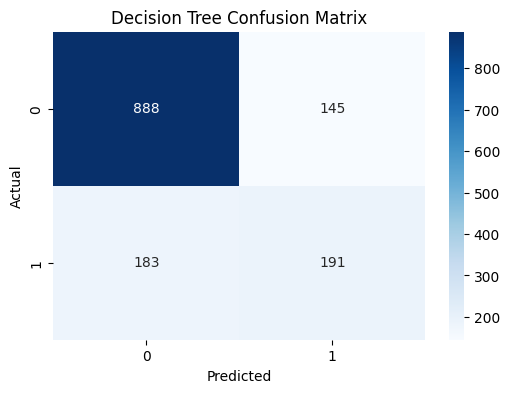


Training Random Forest...


KeyboardInterrupt: 

In [ ]:

# Plot feature importances for Random Forest
def plot_feature_importances(model, X):
    """
    Plot the feature importances of the Random Forest model.
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Path to the dataset (update this to your local path after downloading from Kaggle)
    file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'  # Example: '/path/to/telco_customer_churn.csv'

    # Load and preprocess data
    data = load_data()
    X, y = preprocess_data(data)
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train and evaluate Decision Tree
    print("Training Decision Tree...")
    dt_model = train_decision_tree(X_train, y_train)
    print("Decision Tree Performance:")
    dt_pred = evaluate_model(dt_model, X_test, y_test)
    plot_confusion_matrix(y_test, dt_pred, "Decision Tree Confusion Matrix")

    # Train and evaluate Random Forest
    print("\nTraining Random Forest...")
    rf_model = train_random_forest(X_train, y_train)
    print("Random Forest Performance:")
    rf_pred = evaluate_model(rf_model, X_test, y_test)
    plot_confusion_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")

    # Plot feature importances for Random Forest
    plot_feature_importances(rf_model, X)


Training Random Forest...
Random Forest Performance:
Accuracy: 0.7925
Precision: 0.6454
Recall: 0.4866
F1-Score: 0.5549


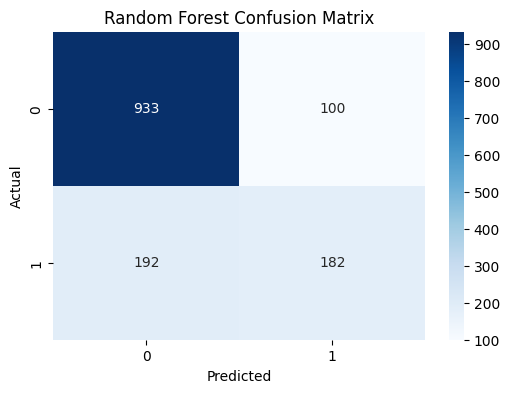

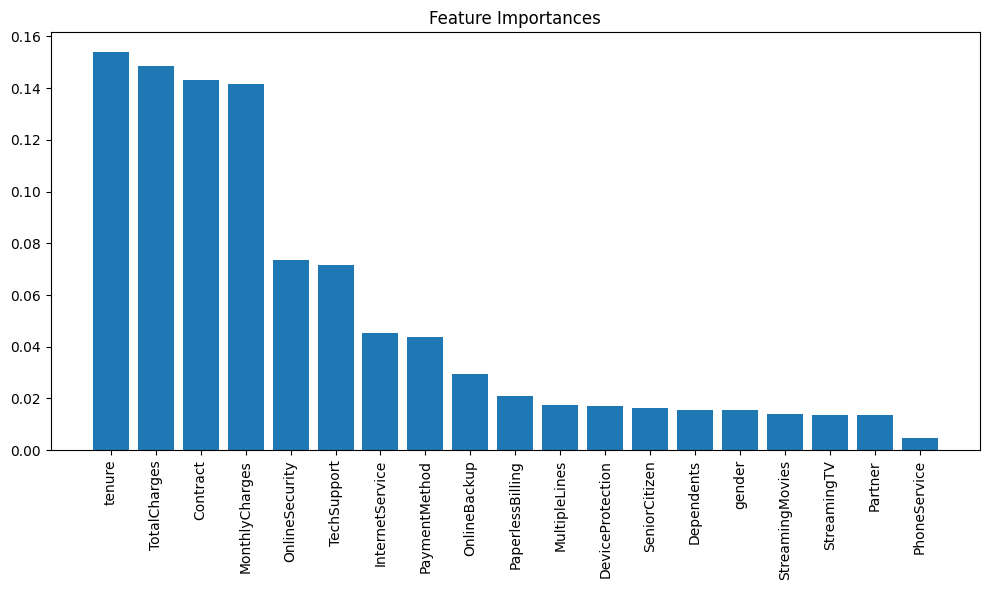

In [ ]:
    # Train and evaluate Random Forest
    print("\nTraining Random Forest...")
    rf_model = train_random_forest(X_train, y_train)
    print("Random Forest Performance:")
    rf_pred = evaluate_model(rf_model, X_test, y_test)
    plot_confusion_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")

    # Plot feature importances for Random Forest
    plot_feature_importances(rf_model, X)